In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from counterflow_file import *

In [2]:
models = ['IEM','MC','EMST']

phif = [1.3, 2.3, 4.8]

Zst = 0.0551863

xlim0 = 0.046
xlim1 = 0.072
xfac = 0.02

dst = 'figs_sample_scatter'

In [36]:
flame_params = {}
flame_params['F'] = 'CH4'
flame_params['p'] = 1
flame_params['a'] = 200
flame_params['phif'] = None
flame_params['phio'] = 0
flame_params['tf'] = 300
flame_params['to'] = 300
flame_params['eqv'] = 1.2
flame_params['var'] = 0.05

folder_params= {}
folder_params['phif'] = None
folder_params['phio'] = 0

In [37]:
# plot
# figure and axes parameters
# total width is fixed, for one column plot
plot_width    = 14.4
margin_left   = 1.1
margin_right  = 0.1
margin_bottom = 1.0
margin_top    = 0.8
space_width   = 0.
space_height  = .6
# for the special column of c-Z plot
space_s_w     = .8
subplt_w      = 3

ftsize        = 9

font = {'family':'serif',
        'weight':'normal',
        'size':ftsize}

# use TEX for interpreter
plt.rc('text',usetex=True)
# use serif font
plt.rc('font',**font)

num_cols = len(models)
num_rows = len(phif)

subplot_width = (plot_width
                 -space_s_w
                 -subplt_w
                 -margin_left
                 -margin_right
                 -(num_cols-1)*space_width
                )/num_cols
subplot_height = subplot_width * 0.6

plot_height = (num_rows*subplot_height
              +margin_bottom
              +margin_top
              +(num_rows-1)*space_height)

Text(0.5,0,'$Z$')

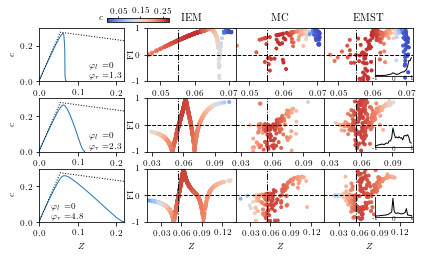

In [38]:
fig, ax = plt.subplots(num_rows,num_cols,
                       sharex='row',sharey=True,
                       figsize=cm2inch(plot_width,plot_height))
axsb = [0.832, 0.54, 0.248]
for i, phi in enumerate(phif):
    flame_params['phif'] = phi
    folder_params['phif'] = phi

    folder = params2name(folder_params)
    flame = params2name(flame_params)

    for j, model in enumerate(models):

        ax[i,j].plot([0, 1],[0.5, 0.5],'k--',linewidth=1)
        ax[i,j].plot([Zst, Zst],[0, 1],'k-.',linewidth=1)

        file_name = '{}/{}.{}'.format(folder,flame,models[j])

        FI = np.genfromtxt(file_name)

        # 1000 pts at largest
        ntotal = FI.shape[0]
        if ntotal > 1000:
            # get PDF of FI for EMST
            hist, bin_edges = np.histogram(
                    FI[:,-1],
                    bins=30,
                    range=(0,1),
                    density=True
                    )

            rect = [0.9,
                    (margin_bottom+(2-i)*(space_height+subplot_height)+0.17)/plot_height,
                    0.09,
                    0.08]
            axs = fig.add_axes(rect)
            axs.set_xlim(0,1)
            axs.set_xticks([0,0.5,1])
            axs.set_xticklabels(['-1','0','1'])
            axs.set_yticks([])
            axs.tick_params(length=0,pad=0.2,labelsize=6)
            axs.spines["right"].set_color('none')
            axs.spines["top"].set_color('none')
            axs.set_facecolor('none')

            axs.plot((bin_edges[:-1]+bin_edges[1:])/2,hist,'k-',lw=1)

            idx = np.random.randint(0,ntotal,200)
            FI = FI[idx,:]

        cplt = ax[i,j].scatter(FI[:,0],FI[:,2],c=FI[:,1],
                               vmin=0,vmax=0.28,
                               marker='.',cmap='coolwarm')
        ax[i,j].set_ylim(0,1)
    ax[i,0].set_ylabel(r'$\mathrm{FI}$')
    ax[i,0].yaxis.set_label_coords(-0.12,0.5)
    ax[i,0].set_yticks([0,0.5,1])
    ax[i,0].set_yticklabels(['-1','0','1'])
    
for j in range(num_cols):
    ax[-1,j].set_xlabel('$Z$')
    ax[0,j].set_title(models[j])

xlim_lb = xlim0
xlim_ub = xlim1
ax[0,0].set_xlim(xlim_lb,xlim_ub)
ax[0,0].set_xticks([0.05, 0.06, 0.07])

xlim_ub = 0.11
xlim_lb = Zst-(Zst-xlim0)/(xlim1-Zst)*(xlim_ub-Zst)
ax[1,0].set_xlim(xlim_lb,xlim_ub)
ax[1,0].set_xticks([0.03, 0.06, 0.09])

xlim_ub = 0.14
xlim_lb = Zst-(Zst-xlim0)/(xlim1-Zst)*(xlim_ub-Zst)
ax[2,0].set_xlim(xlim_lb,xlim_ub)
ax[2,0].set_xticks([0.03, 0.06, 0.09, 0.12])

fig.subplots_adjust(
    left = (margin_left+space_s_w+subplt_w)/plot_width,
    bottom = margin_bottom/plot_height,
    right = 1.0-margin_right/plot_width,
    top = 1.0-margin_top/plot_height,
    wspace = space_width/subplot_width,
    hspace = space_height/subplot_height
    )

cax = fig.add_axes([3.5/plot_width,
                    (plot_height-0.6)/plot_height,
                    2.2/plot_width,
                    0.15/plot_height])
clb = fig.colorbar(cplt,cax=cax,orientation='horizontal')
clb.set_ticks([0.05,0.15,0.25])
cax.tick_params(axis='x',pad=0.1,length=2,labelsize=9)
cax.xaxis.set_ticks_position('top')
fig.text(3.2/plot_width,(plot_height-0.5)/plot_height,'$c$')

del flame_params['eqv']
del flame_params['var']
for i, phi in enumerate(phif):
    axf = fig.add_axes(
        [margin_left/plot_width,
         (margin_bottom+(2-i)*(space_height+subplot_height))/plot_height,
         subplt_w/plot_width,
         subplot_height/plot_height])

    folder_params['phif'] = phi
    flame_params['phif'] = phi

    folder = params2name(folder_params)
    flame = params2name(flame_params)
    
    file_name = '{}/{}.dat'.format(folder,flame)
    data = np.genfromtxt(file_name,skip_header=3,names=True)
    
    axf.plot(data['Z1'],data['C_4spe'],lw=1)
    axf.plot([0,Zst,1],[0,Zst*5,0],'k:',lw=1)
    
    axf.set_xlim([0,0.22])
    axf.set_ylim([0,0.3])
    axf.set_ylabel(r'$c$')
    
    text_loc = 0.13
    if i == 2:
        text_loc = 0.03
    axf.text(text_loc,0.01,
             ''.join([
                 r'$\varphi_l\,=$',
                 '{:g}'.format(0),
                 '\n',
                 r'$\varphi_r=$',
                 '{:g}'.format(phi)
             ]))
axf.set_xlabel(r'$Z$')

In [39]:
fig.savefig('{}/FI_scatter.pdf'.format(dst))
fig.savefig('{}/FI_scatter.eps'.format(dst))